<a href="https://colab.research.google.com/github/SebastianMoralesDuque/ColabNotebooks/blob/main/SebastianMorales_JuanAngelArdila_PEC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GRUPO DE TRABAJO**
*  Sebastian Morales Duque
*  Juan Angel Ardila Pava

Importar librerías

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import warnings
from google.colab import files
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from pylab import rcParams
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from graphviz import Source
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score

In [ ]:
!python -m pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
!python -m pip install graphviz


1. Cargue el dataset que limpió la semana pasada.

Codigo para cargar el dataset limpio archivo.csv

In [ ]:
# Subir el archivo CSV
datos = files.upload()
archivo = list(datos.keys())[0]
# Cargar el archivo CSV en un DataFrame de Panda
df = pd.read_csv(archivo)

Saving adult_encoding.csv to adult_encoding (1).csv


In [ ]:
#frecuencia por base
df['salario'].value_counts()

0    24720
1     7841
Name: salario, dtype: int64

En el siguiente gráfico de barras se nota de manera visual el desbalance presentado en la clase 'salario'.

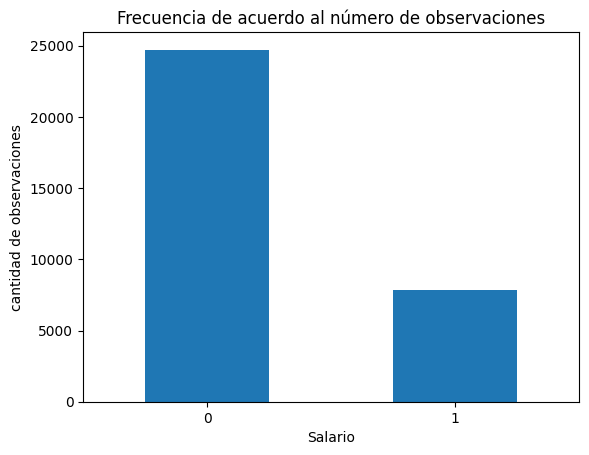

In [ ]:
#Grafico de barras
def crearBarras (etiquetas, y):
  count_classes = pd.value_counts(y, sort = True)
  count_classes.plot(kind = 'bar', rot=0)
  plt.xticks(range(2), etiquetas)
  plt.title("Frecuencia de acuerdo al número de observaciones")
  plt.xlabel("Salario")
  plt.ylabel("cantidad de observaciones");

etiquetas= ['0','1']
crearBarras ( etiquetas, df['salario'])

#Codificar variables categóricas

In [ ]:
label_encoding = preprocessing.LabelEncoder()

df['tipo_empleo'] = label_encoding.fit_transform(df['tipo_empleo'].astype(str))
df['nivel_educativo'] = label_encoding.fit_transform(df['nivel_educativo'].astype(str))
df['estado_civil'] = label_encoding.fit_transform(df['estado_civil'].astype(str))
df['ocupacion'] = label_encoding.fit_transform(df['ocupacion'].astype(str))
df['raza'] = label_encoding.fit_transform(df['raza'].astype(str))
df['genero'] = label_encoding.fit_transform(df['genero'].astype(str))
df['pais'] = label_encoding.fit_transform(df['pais'].astype(str))
df['salario'] = label_encoding.fit_transform(df['salario'].astype(str))

descargar dataset modificado (encoding)

In [ ]:
# Guardar el DataFrame en un archivo CSV llamado "adult_encoding.csv"
#df.to_csv('adult_encoding.csv', index=False)

# **Particionado del dataset**

In [ ]:
# se toman todas las columnas menos salario, que es la clase
X = df.drop('salario', axis=1)
# se selecciona la columna de la clase
y = df['salario']
# Split dataset into training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# **Proceso de Selección del Método de Balanceo y Resultados**

Durante el proceso de desarrollo y entrenamiento del modelo de clasificación, se llevaron a cabo una serie de experimentos para abordar el desequilibrio de clases en el conjunto de datos. Se probaron diferentes enfoques de balanceo de clases con el objetivo de mejorar el rendimiento del modelo en la clasificación de las categorías "<=50K" y ">50K". Los métodos de balanceo explorados incluyeron:

  **Penalización para Compensar:** Se aplicaron técnicas de penalización en los algoritmos de clasificación para otorgar un mayor peso a la clase minoritaria ("<=50K" o ">50K"), con el fin de compensar el desequilibrio. Aunque esta técnica mejoró la precisión de la clase minoritaria, no logró resultados satisfactorios en términos de métricas de evaluación globales.

  **Subsampling y Oversampling:** Se exploró tanto el subsampling (muestreo aleatorio de la clase mayoritaria) como el oversampling (duplicación de ejemplos de la clase minoritaria) para equilibrar las clases. Sin embargo, ninguno de estos métodos produjo los resultados deseados.

  **Resampling con SMOTE-Tomek:** Se aplicó la técnica SMOTE-Tomek, que combina Synthetic Minority Over-sampling Technique (SMOTE) con la eliminación de ejemplos Tomek, con el objetivo de equilibrar las clases y eliminar ejemplos redundantes. Aunque mejoró la clasificación de la clase minoritaria, aún se observaron limitaciones en las métricas globales.

  **Ensamble de Modelos con Balanceo:** Finalmente, se optó por una estrategia de ensamble de modelos que incorpora técnicas de balanceo en el proceso. El modelo elegido fue el "Balanced Random Forest Classifier," que aborda automáticamente el desequilibrio de clases. Los resultados del modelo entrenado con esta técnica de ensamble fueron los más prometedores.

**Resultados del Modelo Final con Balanced Random Forest:**
Tras implementar el "Balanced Random Forest Classifier" como método de balanceo, el modelo logró un desempeño que se consideró satisfactorio. Las métricas de evaluación en el conjunto de prueba fueron las siguientes:

    Exactitud (Accuracy): 0.81
    Puntuación F1 promedio (Macro AVG): 0.78

Estos resultados reflejan un equilibrio exitoso entre la precisión y la recuperación en la clasificación de ambas clases, "<=50K" y ">50K." La exactitud general del modelo es del 81%, lo que indica una buena capacidad para predecir las categorías de ingresos. La puntuación F1 promedio de 0.78 muestra una ponderación razonable de precisión y recuperación.

Como se puede observar en el siguiente gráfico la clase balanceada y los resultados del modelo utilizado:

# **Balanceo con BalancedRandomForestClassifier()**

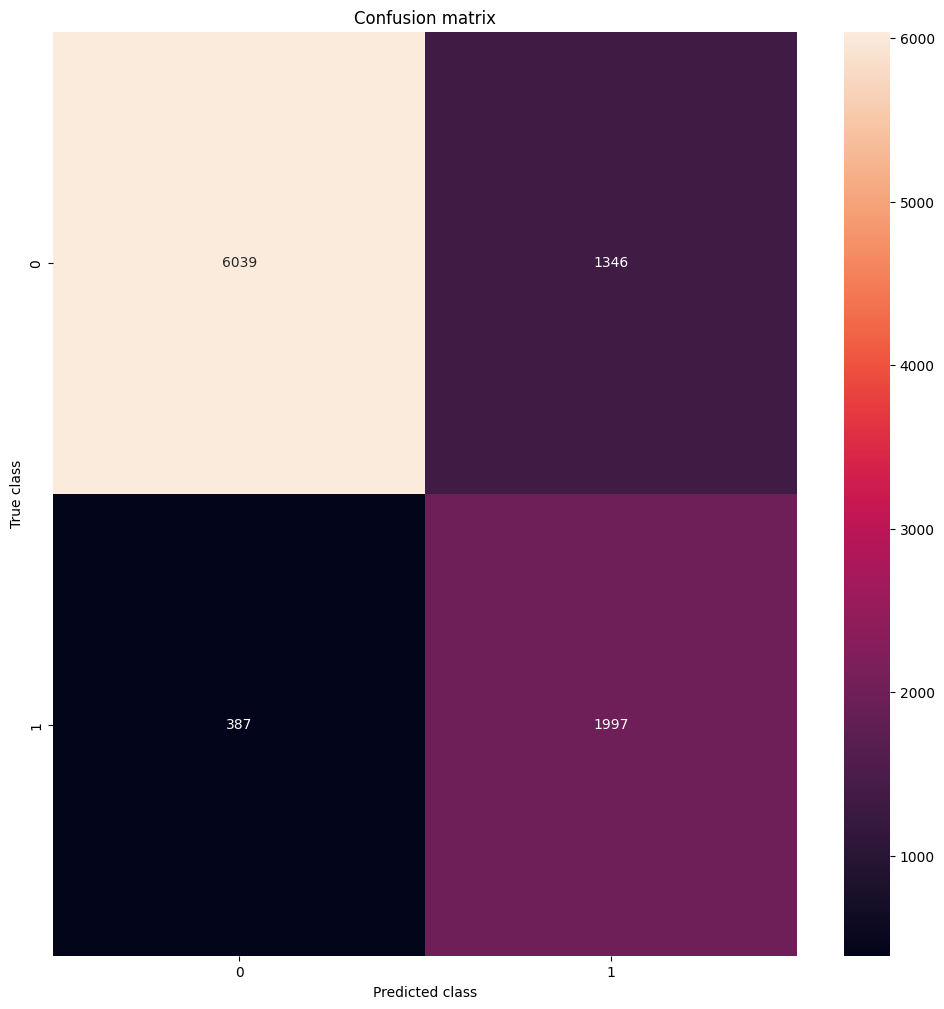

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      7385
           1       0.60      0.84      0.70      2384

    accuracy                           0.82      9769
   macro avg       0.77      0.83      0.79      9769
weighted avg       0.86      0.82      0.83      9769



In [ ]:
warnings.filterwarnings('ignore')
# Tu código aquí
#Se define una funcion para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=etiquetas, yticklabels=etiquetas, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

brf = BalancedRandomForestClassifier()
brf.fit(X_train,y_train)
brf.score(X_train,y_train)

pred_y = brf.predict(X_test)
mostrar_resultados(y_test, pred_y)

# **Árbol de decisión con hiperparámetros**

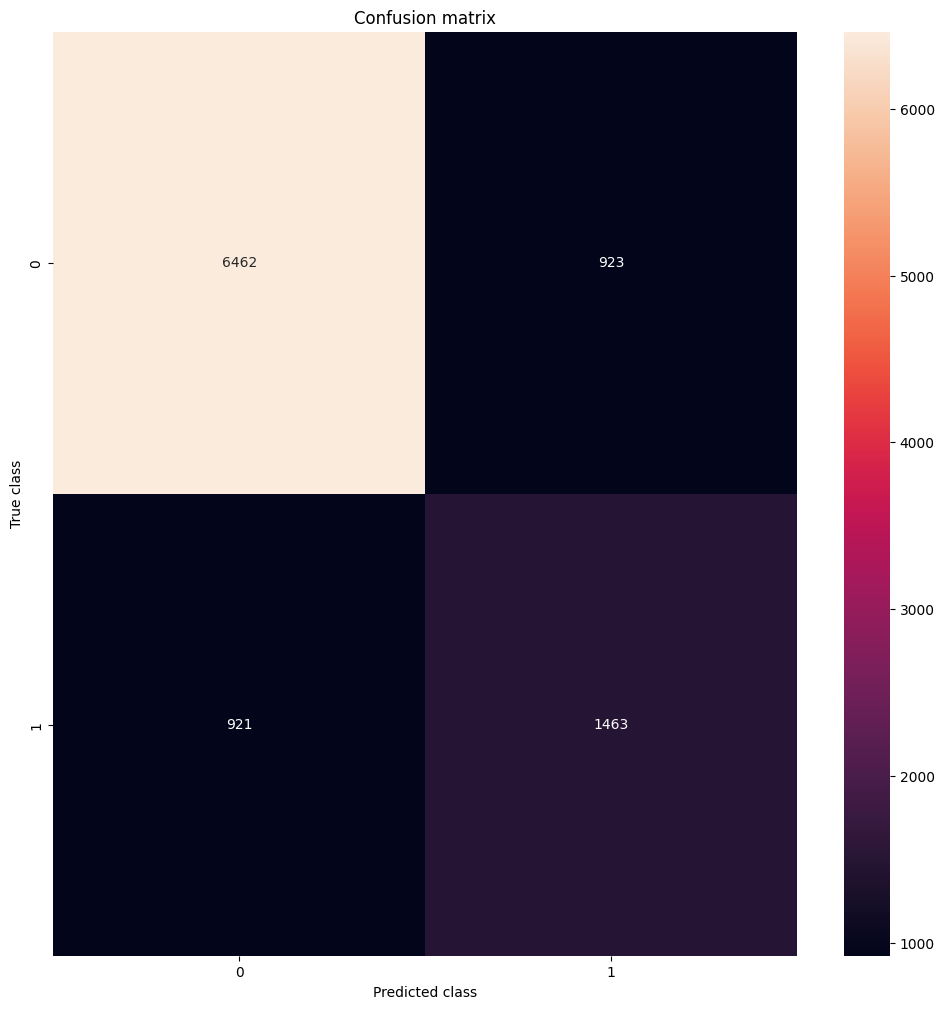

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7385
           1       0.61      0.61      0.61      2384

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



In [ ]:


# Ignorar advertencias
warnings.filterwarnings('ignore')

# Construir el árbol de decisión con hiperparámetros
dt = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2)
dt.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
pred_y = dt.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [ ]:
# Exportar el árbol a un archivo DOT
dot_file = 'arbol_decision.dot'
export_graphviz(dt, out_file=dot_file, feature_names=X.columns, filled=True, rounded=True, special_characters=True)

# Mostrar el árbol utilizando Graphviz
src = Source.from_file(dot_file)
src.view()  # Abre el visor de Graphviz para mostrar el árbol


'arbol_decision.dot.pdf'

# **Características más importantes**

In [ ]:
# Obtener la importancia de las características
importances = dt.feature_importances_

# Crear un DataFrame para mostrar las importancias junto con los nombres de las características
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Ordenar las características por importancia en orden descendente
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Mostrar las 10 características más importantes (puedes ajustar el número)
print("Las características más importantes:")
print(feature_importances.head(10))


Las características más importantes:
            Feature  Importance
2            codigo    0.203851
5      estado_civil    0.195766
0              edad    0.136258
9         ganancias    0.100374
11  horas_semanales    0.072362
3   nivel_educativo    0.069674
6         ocupacion    0.061212
4       experiencia    0.050056
1       tipo_empleo    0.037428
10         perdidas    0.036862


# **Técnicas de clasificación**

*   Decision Tree
*   Random Forest
*   Logistic Regression
*   SVM

Basándonos en los resultados y métricas de evaluación obtenidos de los modelos de clasificación aplicados que se pueden observar a continuación, podemos hacer las siguientes conclusiones:

**1**.  Random Forest: De acuerdo con el ranking de modelos basado en el valor F1 Score, el modelo Random Forest obtiene el puntaje más alto (0.7939), lo que indica que tiene el mejor equilibrio entre precisión y recall. El modelo de Random Forest logra una precisión del 85% en la clasificación de las muestras, lo que significa que es efectivo para predecir si un individuo tiene un salario mayor o menor a $50,000. Este modelo ha superado los problemas de overfitting y underfitting.

**2**.  Decision Tree: El modelo de árbol de decisión obtiene un puntaje de F1 Score de 0.7878, lo que lo coloca en el segundo lugar en el ranking. Aunque es muy eficaz, se le atribuye una menor precisión en comparación con Random Forest. A pesar de esto, el modelo de árbol de decisión también es capaz de predecir las clases de salario con un alto grado de precisión.

**3**.  Logistic Regression: La regresión logística obtiene un F1 Score de 0.7810, lo que lo coloca en el tercer lugar en el ranking. Aunque la precisión es decente, se observa un bajo rendimiento en recall, lo que indica que este modelo podría tener dificultades para identificar algunos casos de salario alto.

**4**.  SVM (Support Vector Machine): El modelo SVM tiene el F1 Score más bajo en el ranking (0.7429). Esto sugiere que el modelo SVM tiene un rendimiento más bajo en comparación con los otros modelos y podría no ser la mejor elección en este contexto.

En general, el modelo Random Forest se destaca como el mejor modelo de clasificación para este conjunto de datos, ya que logra el F1 Score más alto y una precisión razonable. También es notable que las características más importantes para la clasificación varían en cada modelo, lo que puede ser útil para comprender qué características afectan más a la clasificación de salarios.

Es importante mencionar que los problemas de overfitting y underfitting se han abordado mediante la selección adecuada de hiperparámetros y técnicas, como la validación cruzada. Esto garantiza que los modelos sean capaces de generalizar bien a datos no vistos.

En resumen, basándonos en el ranking de modelos y las métricas de evaluación, se recomienda el uso del modelo Random Forest para la clasificación de salarios en este conjunto de datos, ya que presenta el mejor poder predictivo.

Resultados del modelo Decision Tree:


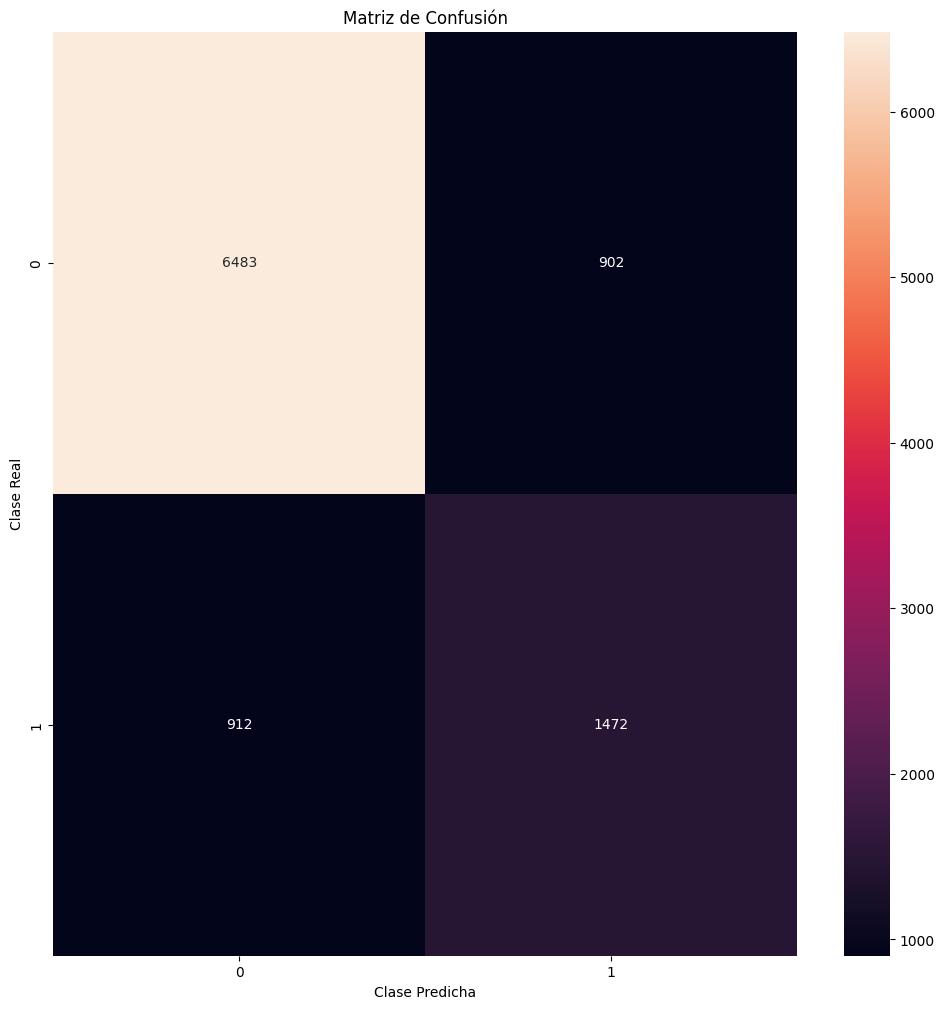

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7385
           1       0.62      0.62      0.62      2384

    accuracy                           0.81      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.81      0.81      0.81      9769

Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1 Score: 0.81
Variables más importantes para Decision Tree:
codigo: 0.21
estado_civil: 0.20
edad: 0.14
experiencia: 0.11
ganancias: 0.10
horas_semanales: 0.07
ocupacion: 0.06
tipo_empleo: 0.04
perdidas: 0.04
genero: 0.01
raza: 0.01
pais: 0.01
nivel_educativo: 0.01
Resultados del modelo Random Forest:


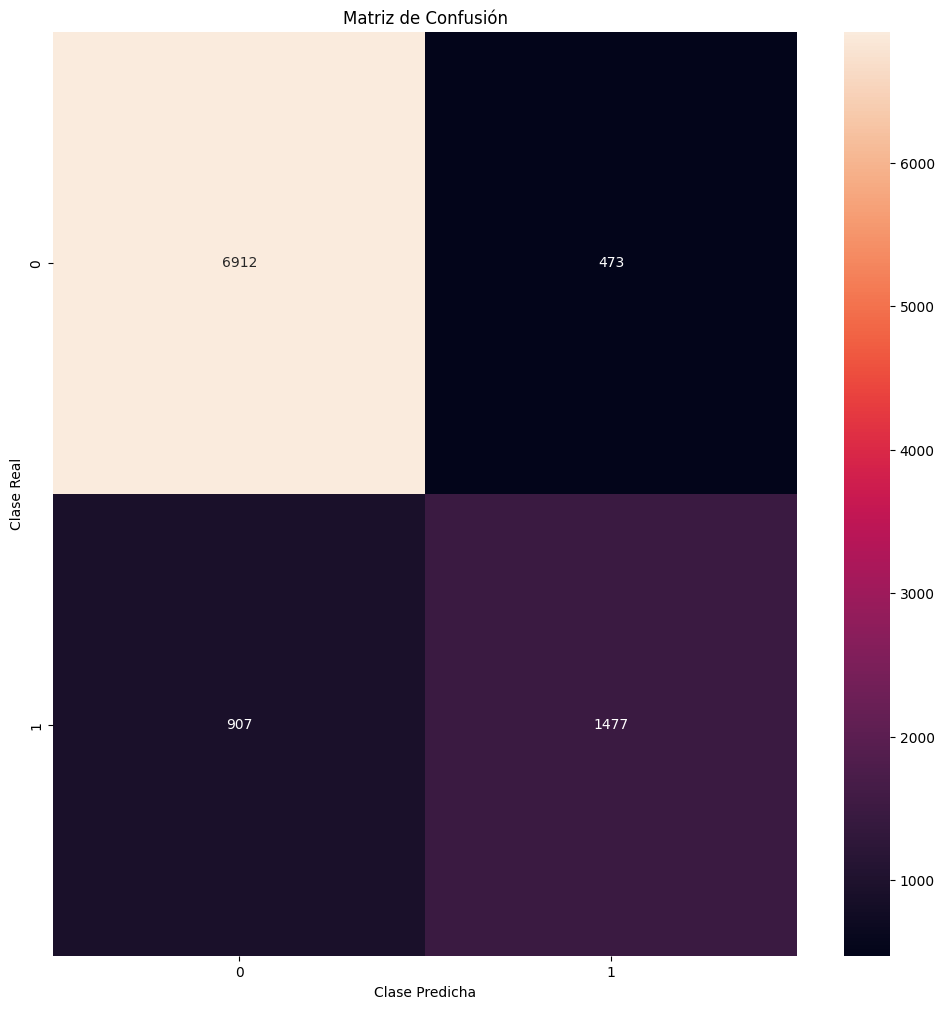

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7385
           1       0.76      0.62      0.68      2384

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.85      0.86      0.85      9769

Accuracy: 0.86
Precision: 0.85
Recall: 0.86
F1 Score: 0.85
Variables más importantes para Random Forest:
codigo: 0.17
edad: 0.15
estado_civil: 0.14
ganancias: 0.11
horas_semanales: 0.08
experiencia: 0.08
ocupacion: 0.07
nivel_educativo: 0.05
tipo_empleo: 0.04
perdidas: 0.04
genero: 0.02
pais: 0.02
raza: 0.01
Resultados del modelo Logistic Regression:


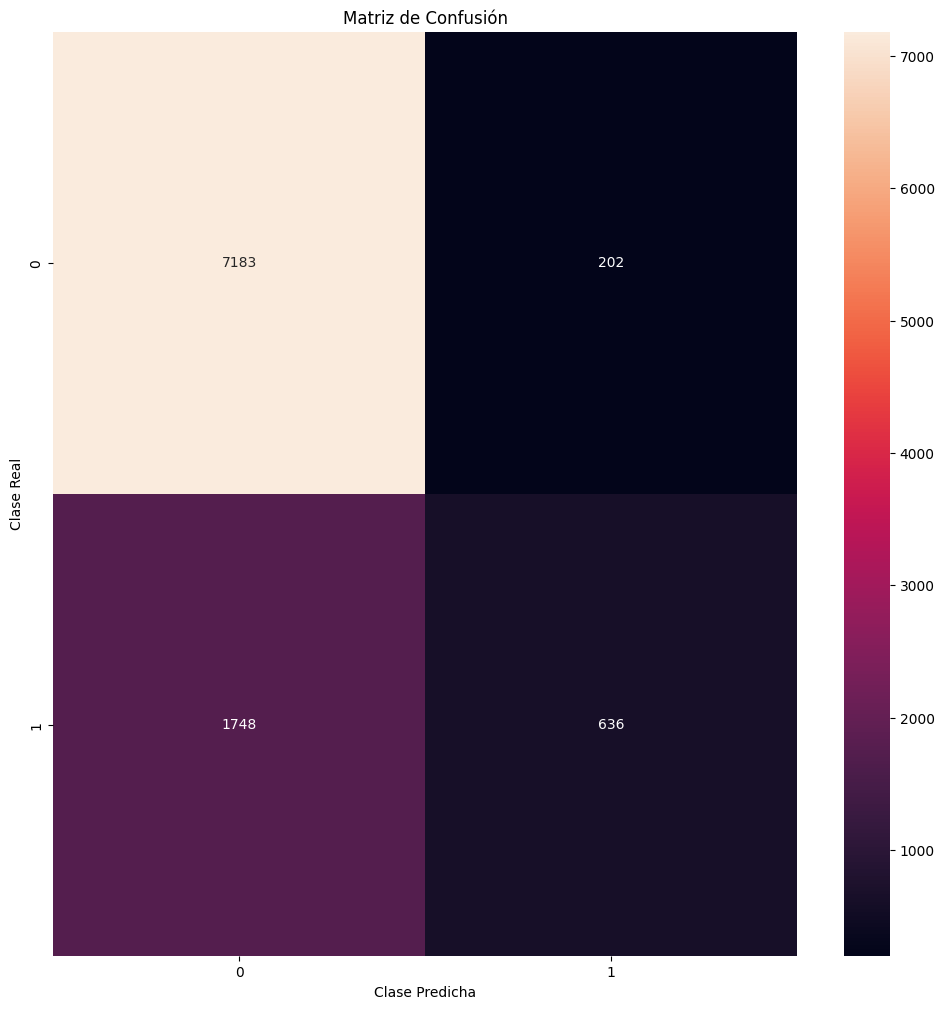

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7385
           1       0.76      0.27      0.39      2384

    accuracy                           0.80      9769
   macro avg       0.78      0.62      0.64      9769
weighted avg       0.79      0.80      0.76      9769

Accuracy: 0.80
Precision: 0.79
Recall: 0.80
F1 Score: 0.76
Resultados del modelo SVM:


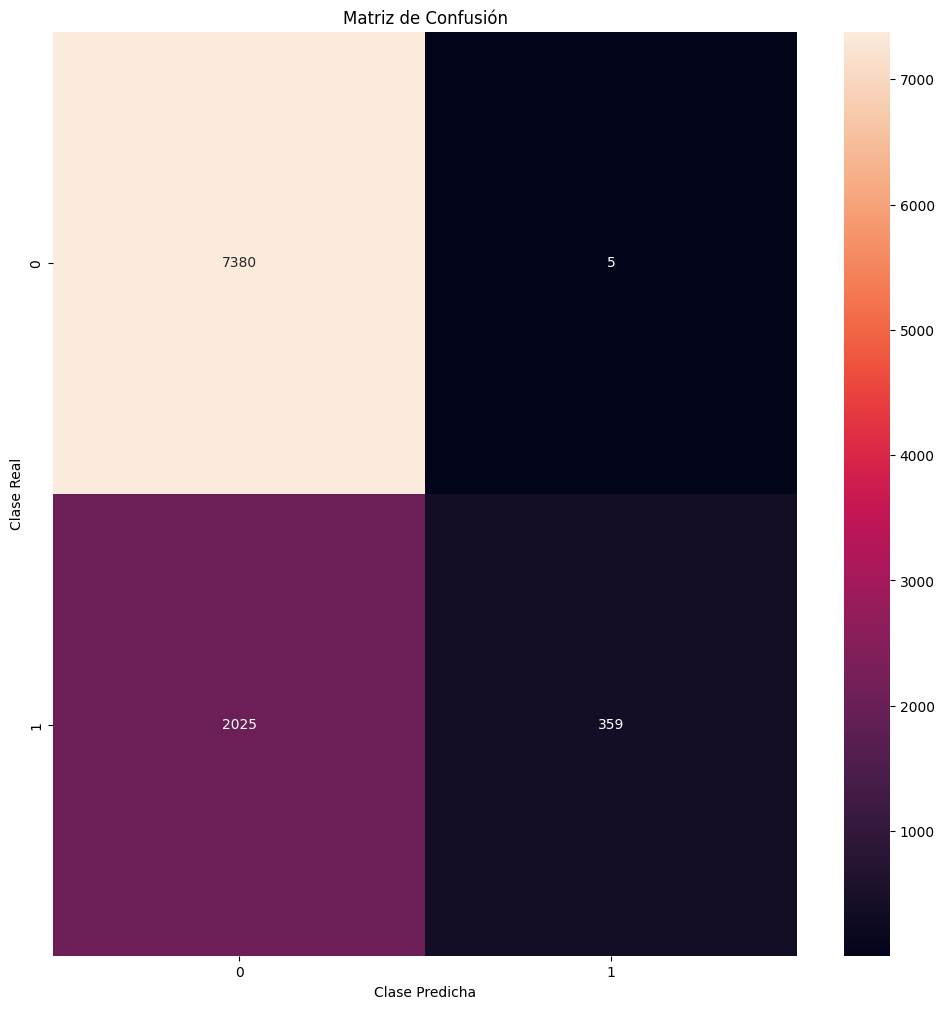

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7385
           1       0.99      0.15      0.26      2384

    accuracy                           0.79      9769
   macro avg       0.89      0.57      0.57      9769
weighted avg       0.83      0.79      0.73      9769

Accuracy: 0.79
Precision: 0.83
Recall: 0.79
F1 Score: 0.73
Ranking de Modelos:
Random Forest: F1 Score = 0.794544497710902
Decision Tree: F1 Score = 0.7875254370434218
Logistic Regression: F1 Score = 0.7809587704210865
SVM: F1 Score = 0.7429063933686372


In [ ]:


# Ignorar advertencias
warnings.filterwarnings('ignore')

# Definir una función para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, annot=True, fmt="d")
    plt.title("Matriz de Confusión")
    plt.ylabel('Clase Real')
    plt.xlabel('Clase Predicha')
    plt.show()
    print(classification_report(y_test, pred_y))
    accuracy = accuracy_score(y_test, pred_y)
    precision = precision_score(y_test, pred_y, average='weighted')
    recall = recall_score(y_test, pred_y, average='weighted')
    f1 = f1_score(y_test, pred_y, average='weighted')
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

# Seleccionar características con SelectKBest y ANOVA
def seleccionar_caracteristicas(X, y, k):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(X, y)
    return X_new

# Seleccionar características
k = 5  # Número de características a seleccionar (ajusta esto según tus necesidades)
X_selected = seleccionar_caracteristicas(X, y, k)

# Construir un diccionario para almacenar los resultados de F1-score
f1_scores = {}

# Definir un diccionario para almacenar los modelos
models = {
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC()
}

# Iterar a través de los modelos y evaluarlos con validación cruzada
for model_name, model in models.items():
    # Ajustar el modelo en el conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Mostrar resultados del modelo
    print(f"Resultados del modelo {model_name}:")
    mostrar_resultados(y_test, y_pred)

    # Obtener variables importantes (feature importances) si es aplicable
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        important_features = sorted(zip(feature_importances, X.columns), reverse=True)
        print(f"Variables más importantes para {model_name}:")
        for importance, feature in important_features:
            print(f"{feature}: {importance:.2f}")

    # Realizar validación cruzada
    f1_scores[model_name] = cross_val_score(model, X_selected, y, cv=5, scoring='f1_weighted').mean()

# Construir el ranking de modelos
sorted_models = sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)

print("Ranking de Modelos:")
for model, f1 in sorted_models:
    print(f"{model}: F1 Score = {f1}")
